<a href="https://colab.research.google.com/github/hy0won/-/blob/master/Subway_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

나눔 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (30.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
# basic 
import time
import random
import math

#data analytics
import numpy as np
import pandas as pd

#Math
import scipy as sp
import statsmodels.api as sm

#web crawling
import requests
from bs4 import BeautifulSoup

#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


지하철 호선별 역별 시간대별 승하차 정보 가져오기

In [ ]:
# Path of the file to read
subway_filepath = "../content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv"

# Read the file into a variable spotify_data
subway_data = pd.read_csv(subway_filepath, index_col=False, encoding='CP949')
subway_data

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202203,1호선,동대문,843,16,11330,1789,8089,5810,13081,...,8196,20,1431,0,0,0,0,0,0,20220403
1,202203,1호선,동묘앞,131,0,2385,808,3044,3872,5339,...,3298,14,1711,0,0,0,0,0,0,20220403
2,202203,1호선,서울역,527,9,7877,5587,10214,32887,33049,...,10263,40,810,0,1,0,0,0,0,20220403
3,202203,1호선,시청,80,0,1651,4430,2627,17551,5925,...,2093,12,224,0,0,0,0,0,0,20220403
4,202203,1호선,신설동,285,8,7379,2393,7452,10201,15754,...,7353,38,1018,1,0,0,0,0,0,20220403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50808,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
50809,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
50810,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
50811,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


월별 강남역의 승차인원 평균 그래프 

In [ ]:
# 지하철역 컬럼안에서 강남인 데이터만 가져오기
GN_sb = subway_data[subway_data['지하철역']=='강남']


# 사용하지 않은 호선명 지하철역 작업일자 컬럼 지우기
GN_sb = GN_sb.drop(columns={'호선명', '지하철역', '작업일자'})

# 사용월을 인덱스로 설정
GN_sb = GN_sb.set_index('사용월')

# 2015년부터 시작하기 위해서 내림차순으로 설정
GN_sb = GN_sb.sort_index(ascending=True)

# 행들의 평균 구하기
GN_sb = GN_sb.mean(axis=1)

# GN_sb가 Series 형태라서 데이터 프레임 형식으로 변형
GN_sb = pd.DataFrame(GN_sb, columns=['MEAN'])

GN_sb

,MEAN
사용월,
201501,148584.479167
201502,121390.187500
201503,139154.958333
201504,128041.875000
201505,125796.729167
...,...
202111,93234.770833
202112,90925.750000
202201,90446.770833


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]), <a list of 87 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text

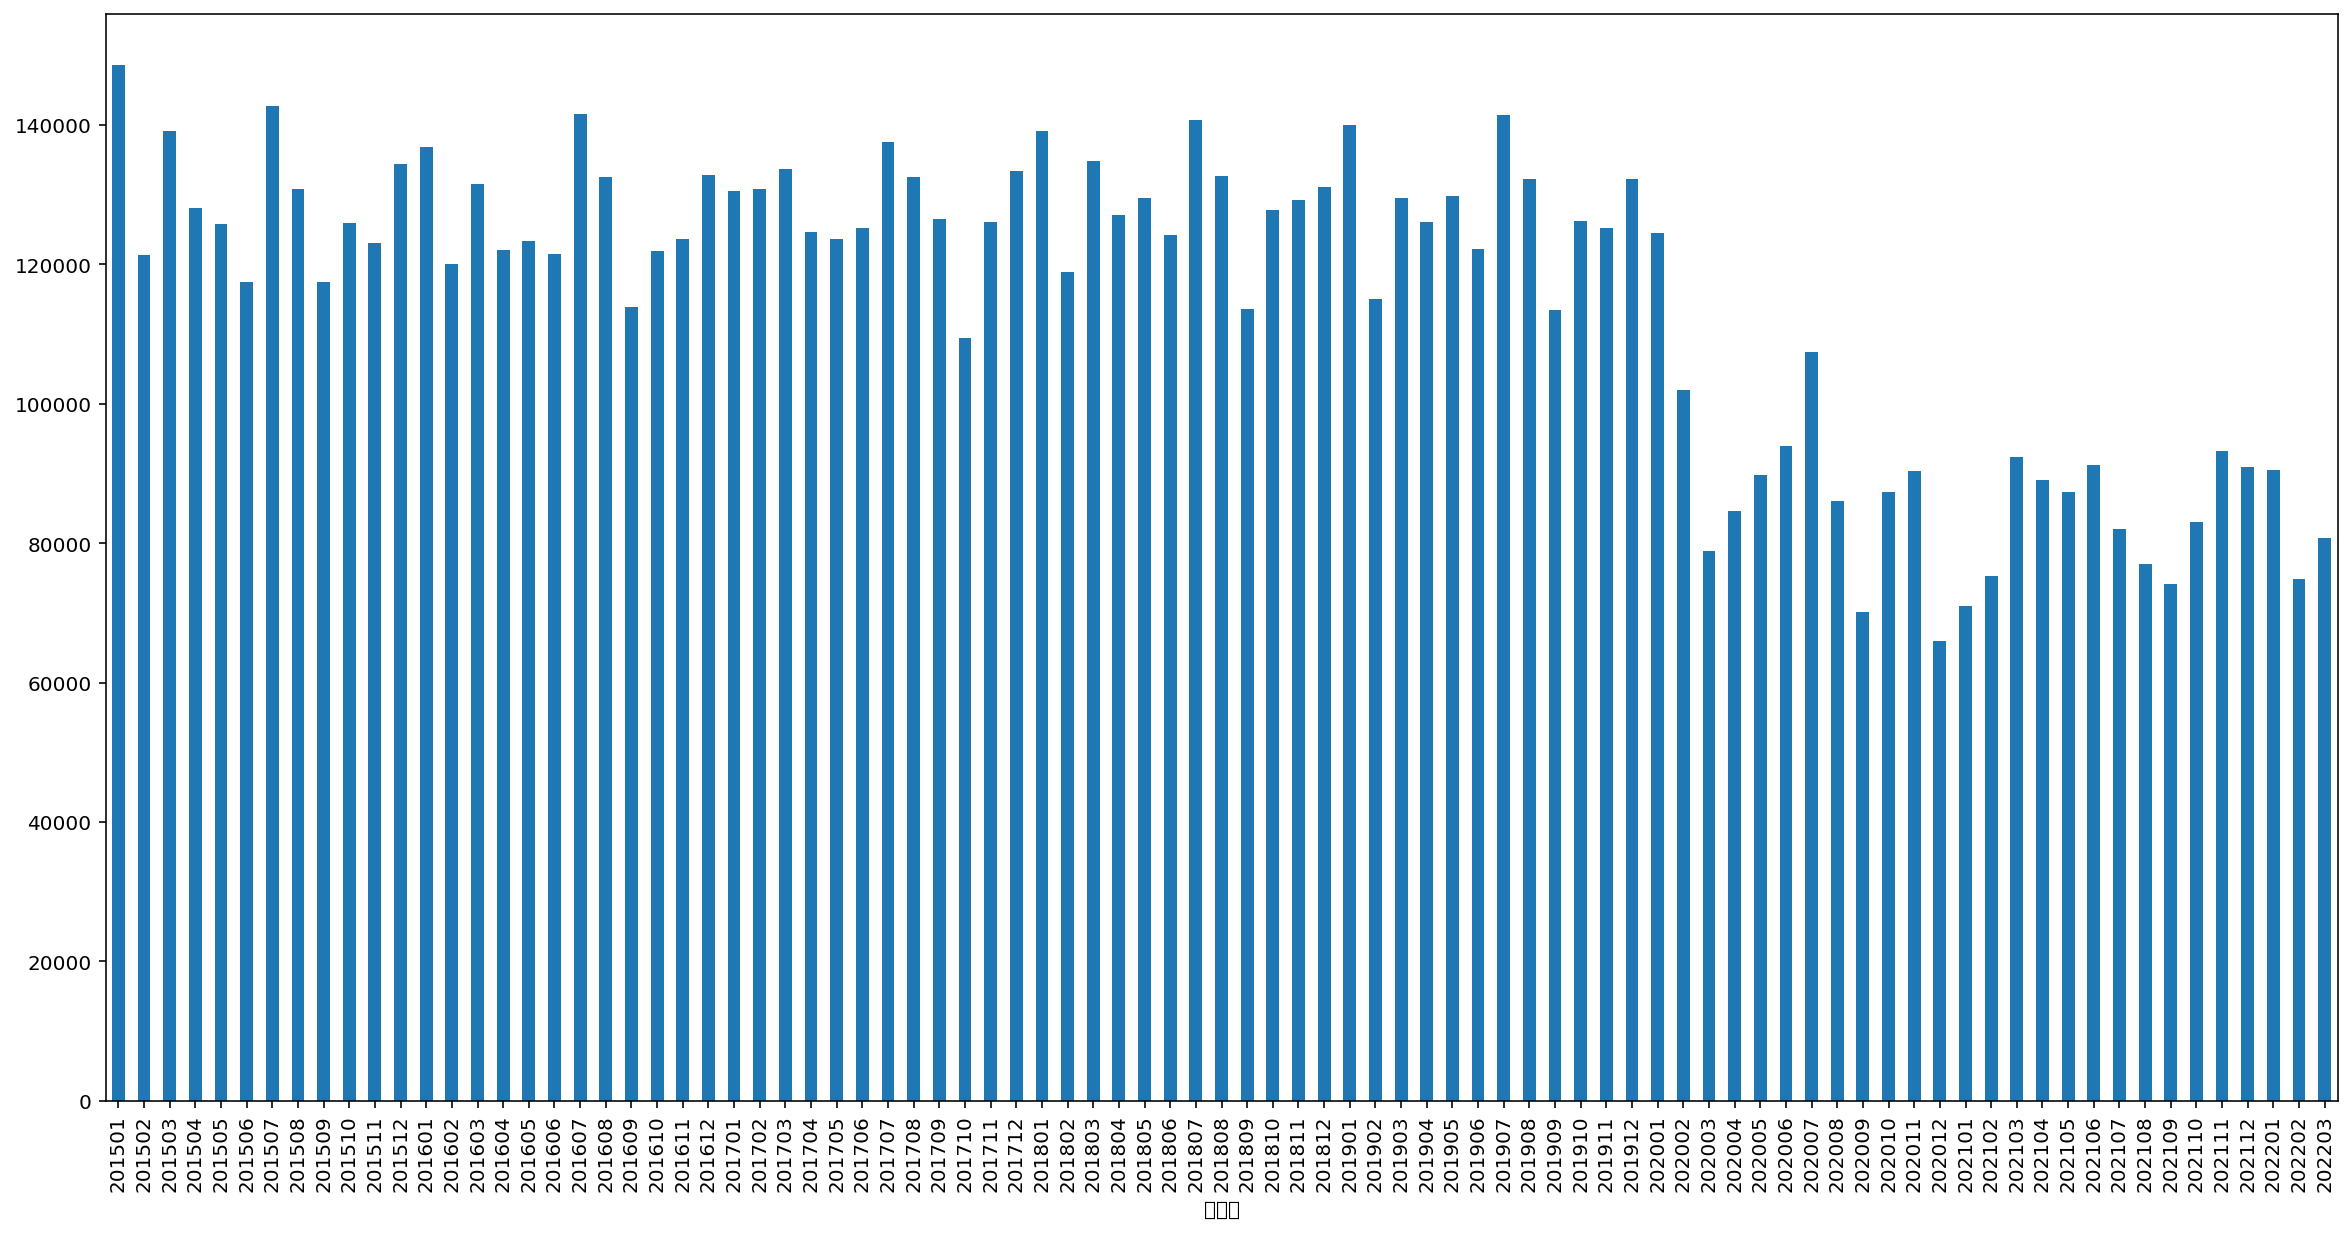

In [ ]:
# 그래프 그리기
plt.figure(figsize=(20,10))

# sb_sum['MEAN'] 데이터를 bar 형식으로 그리기
GN_sb["MEAN"].plot(kind=('bar'))

# X축 항목들의 대한 이름이 겹쳐서 90도 돌리기
plt.xticks(rotation=90)

최고기온일자, 평균최저기온

In [ ]:
# Path of the file to read
weather_filepath = "../content/extremum_20220509145542.csv"

# Read the file into a variable spotify_data
weather_data = pd.read_csv(weather_filepath, index_col=False, encoding='CP949')
weather_data.head()

,일시,최고기온일자,평균최저기온(℃),최저기온(℃),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2015-01-15,-4.8,-9.8,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-15,-2.9,-13.0,2015-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-20,1.0,-6.9,2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-04-30,8.4,3.5,2015-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-28,13.6,8.3,2015-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 필요한 열만 가져오기
weather_data=weather_data[['일시','최고기온일자','평균최저기온(℃)','최저기온(℃)']]
weather_data=weather_data.dropna()
mid_weather_data = weather_data.drop(columns={'최고기온일자', '최저기온(℃)'})
mid_weather_data = mid_weather_data.set_index('일시')
mid_weather_data.head()

,평균최저기온(℃)
일시,
2015-01-15,-9.8
2015-02-15,-13.0
2015-03-20,-6.9
2015-04-30,3.5
2015-05-28,8.3


Text(0, 0.5, 'mean_passenger')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


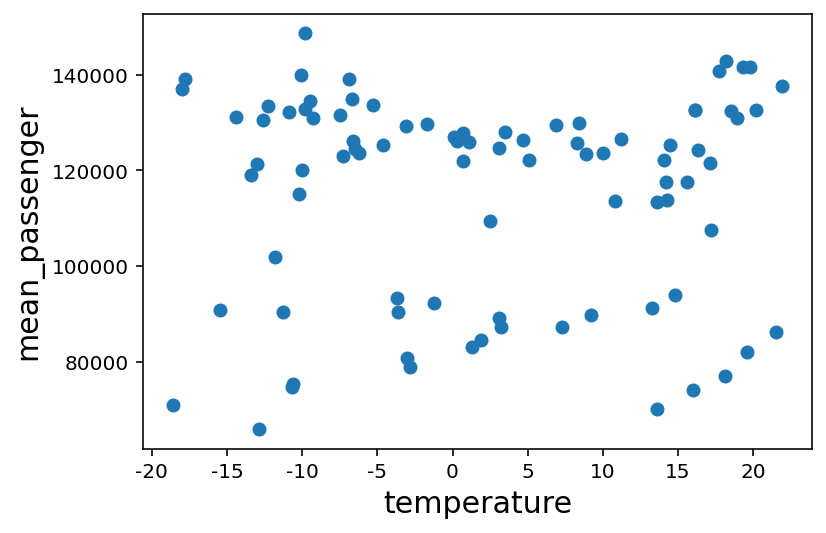

In [ ]:
plt.scatter(mid_weather_data['평균최저기온(℃)'], GN_sb['MEAN'])
plt.xlabel("temperature", fontsize=15)
plt.ylabel("mean_passenger", fontsize=15)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_

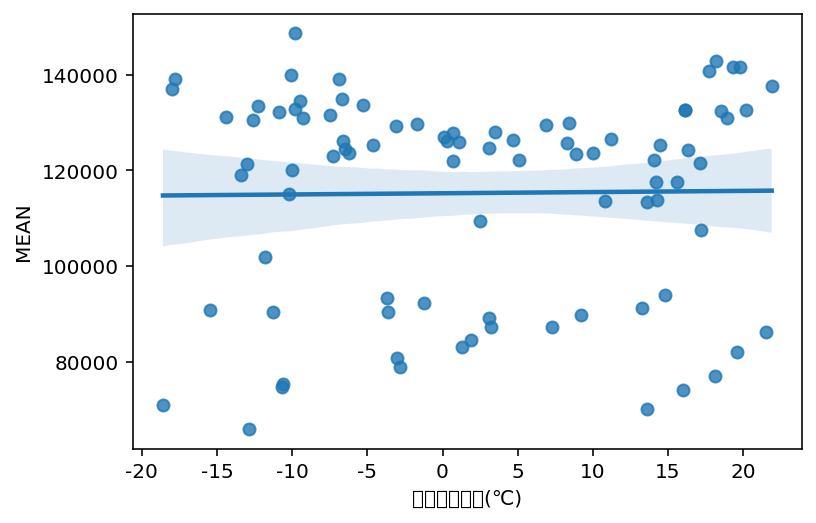

In [ ]:
sns.regplot(x=mid_weather_data['평균최저기온(℃)'], y=GN_sb['MEAN'])

단순 회귀 분석 실험

In [ ]:
x = mid_weather_data[['평균최저기온(℃)']]
y = GN_sb[['MEAN']]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly=poly_features.fit_transform(x)
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변행해준다

PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)

degree 옵션으로 차수를 조절한다.

include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.

이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [ ]:
from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

선형회귀 모델을 만들고, 다항화한 x의 데이터와 기존의 y값을 모델에 fit시켜준다.

이를 통해 모델이 완성되었고 이를 활용할 수도 있다.

In [ ]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline
model_lr = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model_lr.fit(x,y)
print(model_lr.steps[1][1].coef_)

[[-34.12294173  11.47148827]]


make_pipeline을 통해 PolynomialFeatures와 LinearRegression의 과정이 한번으로 통합된 모델을 생성한다.

make_pipeline으로 생성된 모델은 step에 따라 과정이 나누어진다. (steps함수도 존재하여 파이프라인에 포함된 모델의 형태를 확인할수도 있다.)

그렇게 생성된 모델에 x와 y를 fit시키고, 최종적으로 steps를 통해 학습된 모델의 형태를 확인할 수 있다.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


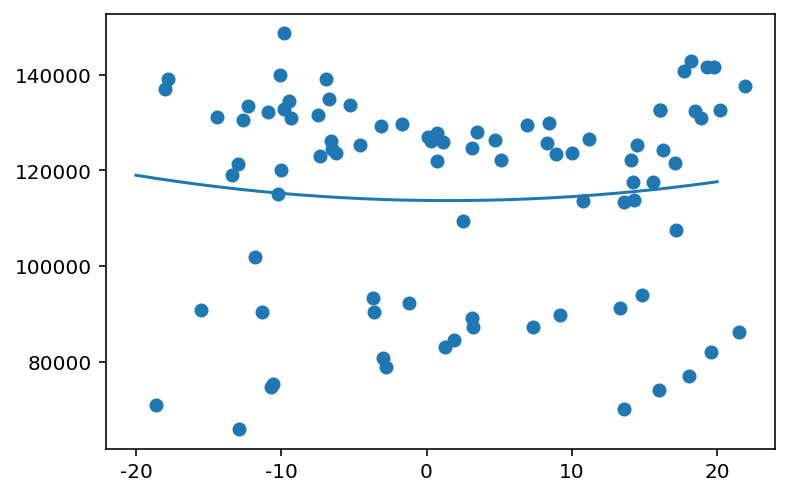

In [ ]:
# 다항회귀 그래프
xx = np.linspace(-20,20,150000)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(mid_weather_data['평균최저기온(℃)'], GN_sb['MEAN'])